Github code test following the readme from:

https://github.com/huggingface/pytorch-pretrained-BigGAN/

In [0]:
!pip install pytorch-pretrained-biggan
!mkdir generated_images

In [0]:
import torch
from pytorch_pretrained_biggan import (BigGAN, one_hot_from_names, truncated_noise_sample,
                                       convert_to_images, save_as_images, display_in_terminal)
from IPython.display import Image
import nltk
nltk.download('wordnet')

img_size = 256 # 128, 256 or 512

# Load pre-trained model tokenizer (vocabulary)
model = BigGAN.from_pretrained('biggan-deep-{}'.format(img_size))

# Prepare a input
truncation = 0.4
class_vector = one_hot_from_names(['iPod', 'mountain bike', "jack-o'-lantern"], batch_size=3)
noise_vector = truncated_noise_sample(truncation=truncation, batch_size=3)

# All in tensors
noise_vector = torch.from_numpy(noise_vector)
class_vector = torch.from_numpy(class_vector)

# Generate an image
with torch.no_grad():
    output = model(noise_vector, class_vector, truncation)

# Save results as png images
save_as_images(output, 'generated_images/output')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


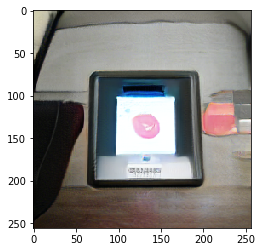

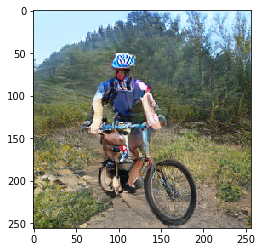

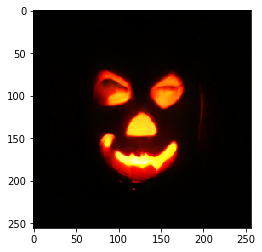

In [0]:
# Display results
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(3):
  image = mpimg.imread("generated_images/output_%d.png" % i)
  plt.imshow(image)
  plt.show()